import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\Data for ML\\Fatigue\\Loc-1\\Just lift - Loc - 1_train.xlsx")

In [3]:
data.head()

,Mast name,Load case,Mastweight,Sectionmodulus,Mastdepth,Overhang,Stressvalue
0,DR410i SP,1G Self weight,22491.0,8.472106,28,594,-20692
1,DR410i SP,1.1G Self weight,24740.1,8.472106,28,594,-22670
2,DR410i SP,1.2G Self weight,26989.2,8.472106,28,594,-24661
3,DR410i SP,1.3G Self weight,29238.3,8.472106,28,594,-26628
4,DR410i SP,0.9G Self weight,20241.9,8.472106,28,594,-18723


In [4]:
data = data.drop('Mast name', axis = 'columns')
data = data.drop('Load case', axis = 'columns')

data.head()

,Mastweight,Sectionmodulus,Mastdepth,Overhang,Stressvalue
0,22491.0,8.472106,28,594,-20692
1,24740.1,8.472106,28,594,-22670
2,26989.2,8.472106,28,594,-24661
3,29238.3,8.472106,28,594,-26628
4,20241.9,8.472106,28,594,-18723


In [5]:
#import smogn

In [6]:
# rg_mtrx = [
#  #   [24000,1,0],
#  #   [30000,1,0],
#  #   [20000,1,0],
# #   [15000,1,0],
# #     [20000,1,0],
#  #    [21000,1,0],
# #     [21500,1,0],
# #     [22000,1,0],
# #     [22500,1,0],
# #     [23000,1,0],
# #     [23500,1,0],
# #     [24000,1,0],
# #     [24500,1,0],
# #     [25000,1,0],
#  #    [25500,1,0],
# #     [26000,1,0],
# #     [26500,1,0],
# #     [27000,1,0],
# #     [27500,1,0],
#     [10000,0,0],
#     [36000,1,0],
# #     [37000,0,0]
# ]

In [7]:
#data_smogn = smogn.smoter(data = data, y = "Stressvalue", rel_method = 'manual', rel_ctrl_pts_rg = rg_mtrx, samp_method = 'extreme')

In [8]:
#data_smogn

In [9]:
#data.shape

In [10]:
#data_smogn.shape

In [11]:
# frames = [data, data_smogn]
# df = pd.concat(frames)
# df

In [12]:
#df.shape

In [13]:
X_train = data[["Mastweight", "Sectionmodulus", "Mastdepth", "Overhang"]]
y_train = data[["Stressvalue"]]

In [14]:
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# param_grid = {"max_depth":    [3, 4, 5, 6],
#               "n_estimators": [500, 600, 700, 800, 900, 1000, 3000, 4000, 5000], "learning_rate": [0.1, 0.2, 0.25, 0.3]}
# xgb_model = xgb.XGBRegressor(eval_metric = 'rmsle')
# search = GridSearchCV(xgb_model, param_grid, cv=5).fit(X_train, y_train.values.ravel())
# print("The best hyperparameters are ",search.best_params_)

In [15]:
xgb_model = xgb.XGBRegressor(max_depth = 3, n_estimators = 5000, learning_rate = 0.1)

In [16]:
xgb_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
test_data = pd.read_excel("C:\\Users\\fl9768\\Desktop\\Data for ML\\Fatigue\\Loc-1\\Just lift - Loc - 1_test.xlsx")
X_test = test_data[["Mastweight", "Sectionmodulus", "Mastdepth", "Overhang"]]
y_test = test_data[["Stressvalue"]]

In [18]:
y_pred_xgb = xgb_model.predict(X_test)

In [19]:
y_pred_xgb

array([-17082.406, -19684.87 , -11752.861, -22852.635, -22757.826,
       -19059.172, -13198.091, -15862.717], dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

RMSE: 664.9310959616862


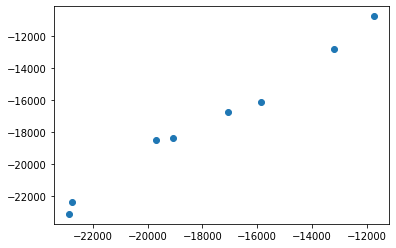

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_xgb, y_test)

In [22]:
y_test['Predicted value RF'] = y_pred_xgb
y_test['Difference'] = abs(y_test['Stressvalue'] - y_test['Predicted value RF'])
y_test

C:\Users\fl9768\AppData\Local\Temp\ipykernel_21636\3240061954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted value RF'] = y_pred_xgb
C:\Users\fl9768\AppData\Local\Temp\ipykernel_21636\3240061954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Difference'] = abs(y_test['Stressvalue'] - y_test['Predicted value RF'])


,Stressvalue,Predicted value RF,Difference
0,-16756,-17082.406250,326.406250
1,-18455,-19684.869141,1229.869141
2,-10748,-11752.861328,1004.861328
3,-23108,-22852.634766,255.365234
4,-22394,-22757.826172,363.826172
5,-18354,-19059.171875,705.171875
6,-12803,-13198.090820,395.090820
7,-16102,-15862.716797,239.283203


In [25]:
import pickle
pickle.dump(xgb_model, open('just_lift_loc_1_xgb.pkl', 'wb'))

In [26]:
just_lift_loc_1_prediction = pickle.load(open('just_lift_loc_1_xgb.pkl', 'rb'))
just_lift_loc_1_prediction.predict(X_test)

array([-17082.406, -19684.87 , -11752.861, -22852.635, -22757.826,
       -19059.172, -13198.091, -15862.717], dtype=float32)